<font size="+3"><strong>Beyond the Model: Data Ethics</strong></font>

In [1]:
import sqlite3 as sql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted


# Prepare Data

**Task 4.4.1:** Connect to the `nepal.db` database.


In [2]:
conn = sql.connect("data/nepal.db")

In [3]:
%load_ext sql

In [4]:
%sql sqlite:///data/nepal.db

**Task 4.4.2:** Select all columns from the `household_demographics` table, limiting your results to the first five rows.

In [5]:
%%sql
SELECT * 
FROM household_demographics
limit 5

*  sqlite:///data/nepal.db
Done.


household_id,district_id,vdcmun_id,ward_id,gender_household_head,age_household_head,caste_household,education_level_household_head,income_level_household,size_household,is_bank_account_present_in_household
12010100001101,12,1207,120703,Male,31.0,Rai,Illiterate,Rs. 10 thousand,3.0,0.0
12010100002101,12,1207,120703,Female,62.0,Rai,Illiterate,Rs. 10 thousand,6.0,0.0
12010100003101,12,1207,120703,Male,51.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,13.0,0.0
12010100004101,12,1207,120703,Male,48.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,5.0,0.0
12010100005101,12,1207,120703,Male,70.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,8.0,0.0


**Task 4.4.3:** How many observations are in the `household_demographics` table? Use the `count` command to find out.


In [6]:
%%sql
SELECT count(*)
FROM household_demographics

*  sqlite:///data/nepal.db
Done.


count(*)
747365


In [7]:
%%sql
SELECT *
FROM building_structure
LIMIT 5

*  sqlite:///data/nepal.db
Done.


building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Reconstruction
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair


In [8]:
%%sql
SELECT *
FROM building_damage
LIMIT 5

*  sqlite:///data/nepal.db
Done.


building_id,district_id,vdcmun_id,ward_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,damage_roof_severe,damage_roof_moderate,damage_roof_insignificant,damage_corner_separation_severe,damage_corner_separation_moderate,damage_corner_separation_insignificant,damage_diagonal_cracking_severe,damage_diagonal_cracking_moderate,damage_diagonal_cracking_insignificant,damage_in_plane_failure_severe,damage_in_plane_failure_moderate,damage_in_plane_failure_insignificant,damage_out_of_plane_failure_severe,damage_out_of_plane_failure_moderate,damage_out_of_plane_failure_insignificant,damage_out_of_plane_failure_walls_ncfr_severe,damage_out_of_plane_failure_walls_ncfr_moderate,damage_out_of_plane_failure_walls_ncfr_insignificant,damage_gable_failure_severe,damage_gable_failure_moderate,damage_gable_failure_insignificant,damage_delamination_failure_severe,damage_delamination_failure_moderate,damage_delamination_failure_insignificant,damage_column_failure_severe,damage_column_failure_moderate,damage_column_failure_insignificant,damage_beam_failure_severe,damage_beam_failure_moderate,damage_beam_failure_insignificant,damage_infill_partition_failure_severe,damage_infill_partition_failure_moderate,damage_infill_partition_failure_insignificant,damage_staircase_severe,damage_staircase_moderate,damage_staircase_insignificant,damage_parapet_severe,damage_parapet_moderate,damage_parapet_insignificant,damage_cladding_glazing_severe,damage_cladding_glazing_moderate,damage_cladding_glazing_insignificant,area_assesed,damage_grade,technical_solution_proposed,has_repair_started,has_damage_foundation,has_damage_roof,has_damage_corner_separation,has_damage_diagonal_cracking,has_damage_in_plane_failure,has_damage_out_of_plane_failure,has_damage_out_of_plane_walls_ncfr_failure,has_damage_gable_failure,has_damage_delamination_failure,has_damage_column_failure,has_damage_beam_failure,has_damage_infill_partition_failure,has_damage_staircase,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
120101000011,12,1207,120703,Moderate-Heavy,Insignificant/light,None,None,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),Severe-Extreme-(<1/3),None,Insignificant/light-(>2/3),Severe-Extreme-(>2/3),None,None,Severe-Extreme-(<1/3),None,None,Severe-Extreme-(>2/3),None,None,None,Moderate-Heavy-(>2/3),None,Severe-Extreme-(>2/3),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Both,Grade 3,Major repair,0.0,None,1.0,1.0,1.0,1.0,None,1.0,0.0,0.0,None,None,None,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
120101000021,12,1207,120703,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,None,None,None,Severe-Extreme-(>2/3),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Exterior,Grade 5,Reconstruction,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,None,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
120101000031,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,None,Insignificant/light-(1/3-2/3),None,None,None,None,None,None,None,None,None,N/A,None,None,None,None,None,None,None,None,Both,Grade 2,Minor repair,1.0,None,None,None,None,None,Non

In [9]:
%%sql
SELECT *
FROM mapping
LIMIT 5

*  sqlite:///data/nepal.db
Done.


individual_id,household_id,building_id
12010100001101001,12010100001101,120101000011
12010100001101002,12010100001101,120101000011
12010100001101003,12010100001101,120101000011
12010100002101001,12010100002101,120101000021
12010100002101002,12010100002101,120101000021


In [13]:
# %%sql
# CREATE VIEW id_map_view AS
# SELECT distinct(household_id),building_id
# FROM mapping;

In [11]:
%%sql
SELECT *
FROM id_map
LIMIT 5

*  sqlite:///data/nepal.db
Done.


ward_id,vdcmun_id,vdcmun_name,district_id,district_name
120101,1201,Champadevi Rural Municipality,12,Okhaldhunga
120102,1201,Champadevi Rural Municipality,12,Okhaldhunga
120103,1201,Champadevi Rural Municipality,12,Okhaldhunga
120104,1201,Champadevi Rural Municipality,12,Okhaldhunga
120105,1201,Champadevi Rural Municipality,12,Okhaldhunga


**Task 4.4.5:** Create a table with all the columns from `household_demographics`, all the columns from `building_structure`, the **`damage_grade`** column from `building_damage`. Your results should show only rows where the **`district_id`** is `36` and limit your results to the first five rows.

In [34]:
%%sql
SELECT h.*  ,s.* ,d.damage_grade ,h.vdcmun_id as municipality_id
FROM household_demographics AS h
JOIN id_map_view AS i ON i.household_id=h.household_id
JOIN building_structure AS s ON i.building_id=s.building_id  
join building_damage as d on s.building_id=d.building_id
WHERE h.district_id=36
LIMIT 5


*  sqlite:///data/nepal.db
Done.


household_id,district_id,vdcmun_id,ward_id,gender_household_head,age_household_head,caste_household,education_level_household_head,income_level_household,size_household,is_bank_account_present_in_household,building_id,district_id_1,vdcmun_id_1,ward_id_1,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,damage_grade,municipality_id
36010100001101,36,3609,360903,Female,50.0,Magar,Illiterate,Rs. 10 thousand,7.0,0.0,360101000011,36,3609,360903,1,0,40,336,6,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear,Reconstruction,Grade 5,3609
36010100002101,36,3609,360903,Male,53.0,Brahman-Hill,Class 4,Rs. 10 thousand,7.0,0.0,360101000021,36,3609,360903,2,2,12,420,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,Minor repair,Grade 3,3609
36010100003101,36,3609,360903,Female,46.0,Chhetree,Class 5,Rs. 10-20 thousand,4.0,1.0,360101000031,36,3609,360903,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,Grade 2,3609
36010100004101,36,3609,360903,Male,73.0,Chhetree,Illiterate,Rs. 10 thousand,2.0,0.0,360101000041,36,3609,360903,2,2,15,390,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,Reconstruction,Grade 4,3609
36010100005101,36,3609,360903,Female,52.0,Chhetree,Illiterate,Rs. 10 thousand,1.0,0.0,360101000051,36,3609,360903,2,2,15,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Square,0,1,0,0,0,0,0,0,0,0,0,Damaged-Not used,Reconstruction,Grade 4,3609


## Import

In [51]:
def wrangle(db_path):
    # Connect to database
    conn = sql.connect(db_path)

    # Construct query
    query = """
            SELECT h.*  ,s.* ,d.damage_grade ,h.vdcmun_id as municipality_id 
            FROM household_demographics AS h
            JOIN id_map_view AS i ON i.household_id=h.household_id
            JOIN building_structure AS s ON i.building_id=s.building_id  
            join building_damage as d on s.building_id=d.building_id
            WHERE h.district_id=36
            """

    # Read query results into DataFrame
    df = pd.read_sql(query,conn,"household_id")
    
    # identify leaky columns
    drop_cols = [col for col in df.columns if "post_eq" in col]
    
    # create binary target
    df["damage_grade"]= df["damage_grade"].str[-1].astype(int)
    df["severe_damage"]=(df["damage_grade"]>3).astype(int)
    
    # Drop unnecessary features 
    drop_cols.append("technical_solution_proposed")
    
    # drop old target
    drop_cols.append("damage_grade")
    
    # drop multicollinearty columns
    drop_cols.append("count_floors_pre_eq")
    
    # drop haigh cardinality
    drop_cols.extend(["district_id","ward_id","building_id","vdcmun_id"])
    
    top_10=df["caste_household"].value_counts().head(10).index
    df["caste_household"]= df["caste_household"].apply(lambda c:c if c in top_10 else "Others")
    
    # drop leaky columns 
    df.drop(columns=drop_cols , inplace=True)
    
    return df

In [52]:
df = wrangle("data/nepal.db")
pd.set_option('display.max_columns', None)
df.head()

,gender_household_head,age_household_head,caste_household,education_level_household_head,income_level_household,size_household,is_bank_account_present_in_household,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,municipality_id,severe_damage
household_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36010100001101,Female,50.0,Magar,Illiterate,Rs. 10 thousand,7.0,0.0,40,336,6,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,3609,1
36010100002101,Male,53.0,Brahman-Hill,Class 4,Rs. 10 thousand,7.0,0.0,12,420,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,3609,0
36010100003101,Female,46.0,Chhetree,Class 5,Rs. 10-20 thousand,4.0,1.0,20,560,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,3609,0
36010100004101,Male,73.0,Chhetree,Illiterate,Rs. 10 thousand,2.0,0.0,15,390,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,3609,1
36010100005101,Female,52.0,Chhetree,Illiterate,Rs. 10 thousand,1.0,0.0,15,290,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Square,0,1,0,0,0,0,0,0,0,0,0,3609,1


In [37]:
df.shape

(75883, 30)

In [62]:
df["municipality_id"].unique()

array([3609, 3601, 3604, 3610, 3607, 3605, 3611, 3608, 3602, 3606, 3603],
      dtype=int64)

**Task 4.4.7:** Combine the [`select_dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) and [`nunique`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) methods to see if there are any high- or low-cardinality categorical features in the dataset. 


In [53]:
# Check for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

gender_household_head              2
caste_household                   11
education_level_household_head    19
income_level_household             5
land_surface_condition             3
foundation_type                    5
roof_type                          3
ground_floor_type                  5
other_floor_type                   4
position                           4
plan_configuration                10
dtype: int64

**Task 4.4.8:** Adding to `wrangle` function so that the `"caste_household"` contains only the 10 largest caste groups. For the rows that are not in those groups, `"caste_household"` should be changed to `"Other"`.


In [58]:
# df["caste_household"].value_counts().head(10)

In [57]:
# list(df["caste_household"].value_counts().head(10).index)

In [41]:
# top_10=df["caste_household"].value_counts().head(10).index
# df["caste_household"].apply(lambda c:c if c in top_10 else "Others")

In [42]:
# df["caste_household"].apply(lambda c:c if c in top_10 else "Others").value_counts()

In [59]:
df["caste_household"].nunique()

11

## Split

**Task 4.4.9:** Create your feature matrix `X` and target vector `y`. Since our model will only consider building and household data, `X` should not include the municipality column `"vdcmun_id"`. Your target is `"severe_damage"`. 

In [61]:
target = "severe_damage"
X = df.drop(columns=[target,"municipality_id"])
y = df[target]

**Task 4.4.10:** Divide your data (`X` and `y`) into training and test sets using a randomized train-test split. Your test set should be 20% of your total data. Be sure to set a `random_state` for reproducibility.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2 , random_state=42
)

# Build Model

## Baseline

**Task 4.4.11:** Calculate the baseline accuracy score for your model.


In [64]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.63


## Iterate

**Task 4.4.12:** Create a Pipeline called `model_lr`. It should have an `OneHotEncoder` transformer and a `LogisticRegression` predictor. Be sure you set the `use_cat_names` argument for your transformer to `True`.


In [65]:
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=3000)
)
model_lr.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender_household_head', 'caste_household',
                                     'education_level_household_head',
                                     'income_level_household',
                                     'land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=3000))])

## Evaluate

**Task 4.4.13:** Calculate the training and test accuracy scores for `model_lr`. 


In [66]:
acc_train = accuracy_score(y_train,model_lr.predict(X_train))
acc_test = model_lr.score(X_test,y_test)

print("LR Training Accuracy:", acc_train)
print("LR Validation Accuracy:", acc_test)

LR Training Accuracy: 0.7230751490791685
LR Validation Accuracy: 0.7186532252750873


# Communicate

**Task 4.4.14:** First, extract the feature names and importances from your model. Then create a pandas Series named `feat_imp`, where the index is `features` and the values are your the exponential of the `importances`.


In [68]:
features = model_lr.named_steps["onehotencoder"].get_feature_names_out()
importances = model_lr.named_steps["logisticregression"].coef_[0]
feat_imp = pd.Series(np.exp(importances),index=features).sort_values()
feat_imp.head()

has_superstructure_cement_mortar_brick    0.257390
foundation_type_RC                        0.329164
has_superstructure_rc_non_engineered      0.394413
has_superstructure_other                  0.424686
roof_type_RCC/RB/RBC                      0.443236
dtype: float64

**Task 4.4.15:** Create a horizontal bar chart with the ten largest coefficients from `feat_imp`. Be sure to label your x-axis `"Odds Ratio"`.
​

Text(0.5, 0, 'Odds Ratio')

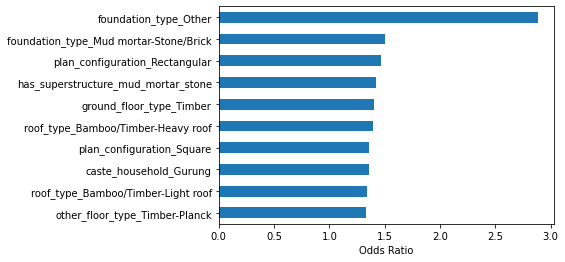

In [71]:
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Odds Ratio")

**Task 4.4.16:** Create a horizontal bar chart with the ten smallest coefficients from `feat_imp`. Be sure to label your x-axis `"Odds Ratio"`.


Text(0.5, 0, 'Odds Ratio')

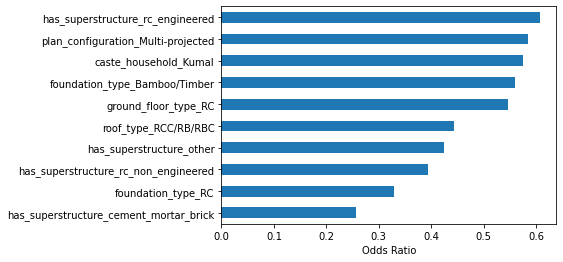

In [72]:
feat_imp.head(10).plot(kind="barh")
plt.xlabel("Odds Ratio")

## Explore Some More

**Task 4.4.17:** Which municipalities saw the highest proportion of severely damaged buildings? Create a DataFrame `damage_by_vdcmun` by grouping `df` by `"vdcmun_id"` and then calculating the mean of the `"severe_damage"` column. Be sure to sort `damage_by_vdcmun` from highest to lowest proportion.


In [75]:
damage_by_vdcmun = (
    df.groupby("municipality_id")["severe_damage"].mean().sort_values(ascending=False)
).to_frame()
damage_by_vdcmun

,severe_damage
municipality_id,
3602,0.930199
3603,0.851117
3606,0.827145
3601,0.824201
3604,0.782464
3605,0.666979
3610,0.572344
3611,0.512444
3609,0.506425


**Task 4.4.18:** Create a line plot of `damage_by_vdcmun`. Label your x-axis `"Municipality ID"`, your y-axis `"% of Total Households"`, and give your plot the title `"Household Damage by Municipality"`.
​

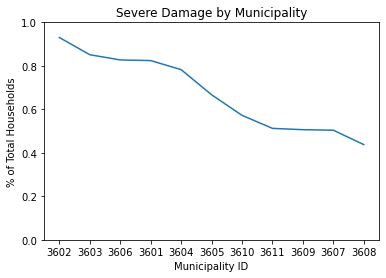

In [80]:
# Plot line
plt.plot(damage_by_vdcmun.values)
plt.xticks(range(len(damage_by_vdcmun)),labels=damage_by_vdcmun.index)
plt.yticks(np.arange(0.0,1.1,0.2))
plt.xlabel("Municipality ID")
plt.ylabel("% of Total Households")
plt.title("Severe Damage by Municipality");

**Task 4.4.19:** Create a new column in `damage_by_vdcmun` that contains the the proportion of Gurung households in each municipality.


In [82]:
damage_by_vdcmun["Gurung"] = (
    df[df["caste_household"]=="Gurung"].groupby("municipality_id")["severe_damage"].count()
    / df.groupby("municipality_id")["severe_damage"].count()
)
damage_by_vdcmun

,severe_damage,Gurung
municipality_id,,
3602,0.930199,0.326937
3603,0.851117,0.387849
3606,0.827145,0.826889
3601,0.824201,0.338152
3604,0.782464,0.011943
3605,0.666979,0.385084
3610,0.572344,0.097971
3611,0.512444,0.246727
3609,0.506425,0.049023


**Task 4.4.20:** Create a new column in `damage_by_vdcmun` that contains the the proportion of Kumal households in each municipality. Replace any `NaN` values in the column with `0`.


In [86]:
damage_by_vdcmun["Kumal"] = (
    df[df["caste_household"]=="Kumal"].groupby("municipality_id")["severe_damage"].count()
    / df.groupby("municipality_id")["severe_damage"].count()
).fillna(0)
damage_by_vdcmun

,severe_damage,Gurung,Kumal
municipality_id,,,
3602,0.930199,0.326937,0.000000
3603,0.851117,0.387849,0.000000
3606,0.827145,0.826889,0.000000
3601,0.824201,0.338152,0.000000
3604,0.782464,0.011943,0.029478
3605,0.666979,0.385084,0.000000
3610,0.572344,0.097971,0.000267
3611,0.512444,0.246727,0.036973
3609,0.506425,0.049023,0.100686


**Task 4.4.21:** Create a visualization that combines the line plot of severely damaged households you made above with a stacked bar chart showing the proportion of Gurung and Kumal households in each district. Label your x-axis `"Municipality ID"`, your y-axis `"% of Total Households"`.


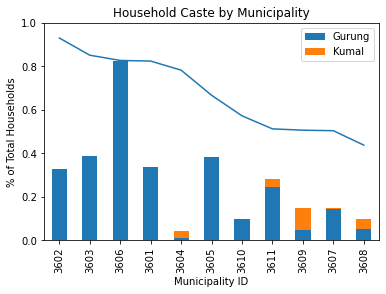

In [89]:
damage_by_vdcmun.drop(columns="severe_damage").plot(
    kind="bar",stacked=True
)
plt.plot(damage_by_vdcmun["severe_damage"].values)
plt.xticks(range(len(damage_by_vdcmun)),labels=damage_by_vdcmun.index)
plt.yticks(np.arange(0.0,1.1,0.2))
plt.xlabel("Municipality ID")
plt.ylabel("% of Total Households")
plt.title("Household Caste by Municipality")
plt.legend();